In [1]:
from sklearn.preprocessing import Normalizer
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from model import GGNN
import torch.nn as nn
import time
import sys
from tqdm import tqdm
from model import Utils
from model import Plot

In [2]:
folder = 'datasets/'
Dataset14 = torch.load(folder + 'dataset14.pt')
Dataset15 = torch.load(folder + 'dataset15.pt')
Dataset16 = torch.load(folder + 'dataset16.pt')
Dataset17 = torch.load(folder + 'dataset17.pt')
#UnrelatedDataset = torch.load('unrelated_dataset_rev6.pt')

adj_matrices14 = torch.load(folder + 'adj_matrices14.pt')
adj_matrices15 = torch.load(folder + 'adj_matrices15.pt')
adj_matrices16 = torch.load(folder + 'adj_matrices16.pt')
adj_matrices17 = torch.load(folder + 'adj_matrices17.pt')

## Hyperparameters

In [3]:
EPOCHS = 400 # 400 Training Epochs

PROPAG_STEPS = 5 # Neighborhood Interation
HIDDEN_LAYER = 64 # Hidden Layeer Size

BATCH_SIZE = 45 # Bath_size to train/test

#STEPS_PER_EPOCH = int((len(TrainDataset)/BATCH_SIZE) * 3) # 3 times

## Create a model

In [4]:
#model = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

# Instantiate model
model_14 = GGNN.GGNNModel(1, HIDDEN_LAYER, PROPAG_STEPS).cuda()

# Load trained model 
state_dict_file = 'trained_models/_model_state_dict14.pt'
device = torch.device('cuda')
model_14.load_state_dict(torch.load(state_dict_file, map_location=device))
model_14.eval()

GGNNModel(
  (linear_i): Linear(in_features=1, out_features=64, bias=True)
  (gru): GRUCell(
    (linear_z): Linear(in_features=192, out_features=64, bias=True)
    (linear_r): Linear(in_features=192, out_features=64, bias=True)
    (linear): Linear(in_features=192, out_features=64, bias=True)
  )
  (linear_o): Linear(in_features=64, out_features=1, bias=True)
)

## Hyperparamter para Dataset 15

In [5]:
TestDataset = Dataset15
adj_matrices = adj_matrices15
model = model_14
STEPS_PER_EPOCH = int((len(TestDataset)/BATCH_SIZE) * 3) # 3 times

# Test Dataset 15

In [6]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, BATCH_SIZE)

Epoch: 68 - Loss: 0.36 - Total_Time: 14.7 mins: 100%|████████████████████████████████| 773/773 [00:12<00:00, 59.65it/s]


Epoch: 136 - Loss: 0.17 - Total_Time: 29.0 mins: 100%|███████████████████████████████| 773/773 [00:12<00:00, 63.74it/s]


Epoch: 204 - Loss: 0.21 - Total_Time: 42.5 mins: 100%|███████████████████████████████| 773/773 [00:11<00:00, 67.74it/s]


Epoch: 272 - Loss: 0.2 - Total_Time: 56.8 mins: 100%|████████████████████████████████| 773/773 [00:12<00:00, 60.27it/s]


Epoch: 340 - Loss: 0.8 - Total_Time: 71.4 mins: 100%|████████████████████████████████| 773/773 [00:12<00:00, 60.10it/s]


Epoch: 400 - Loss: 0.25 - Total_Time: 84.2 mins: 100%|███████████████████████████████| 773/773 [00:12<00:00, 61.09it/s]


# Plots

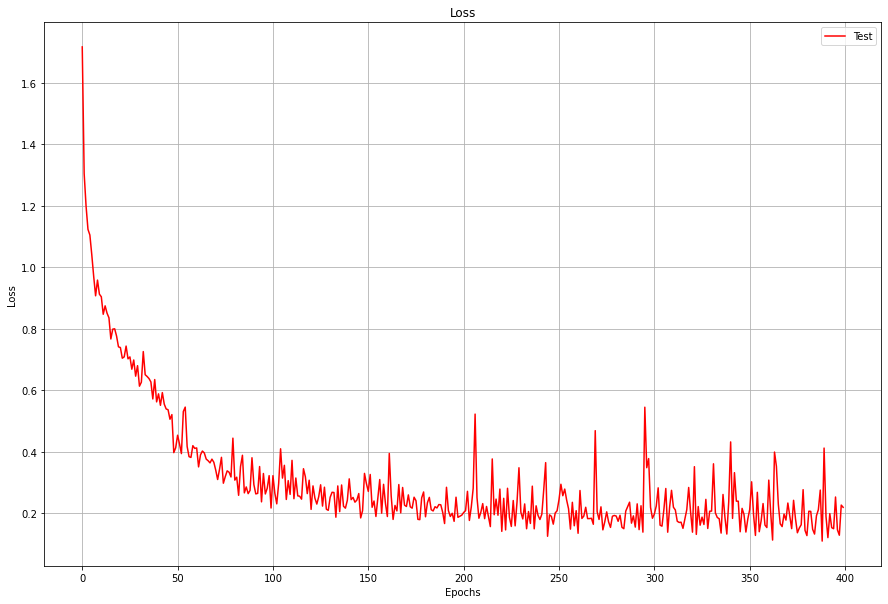

In [7]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics_tst['loss_ls'], title)

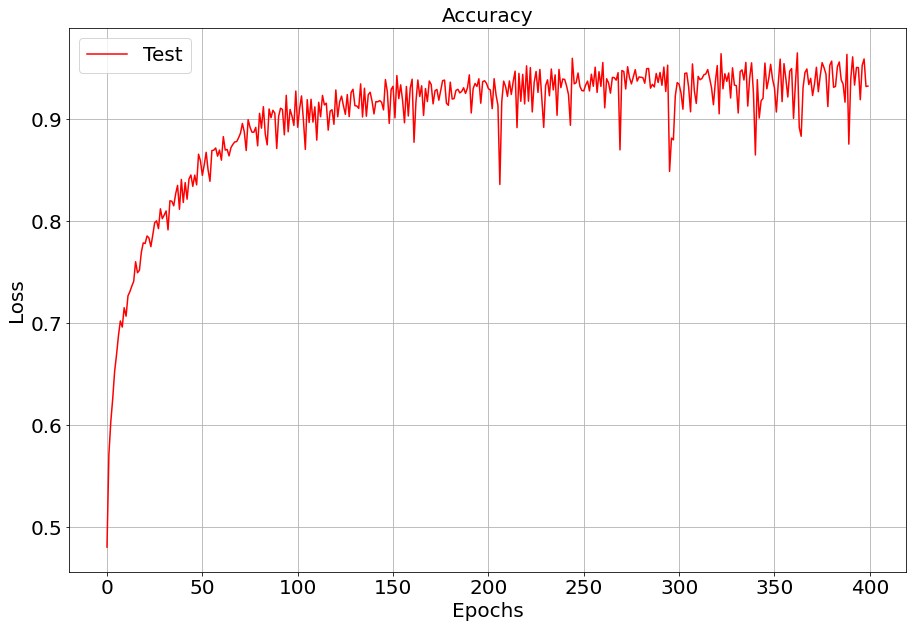

In [9]:
title_Acc = 'Accuracy'
Plot.Plot(statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.874212  0.017709  0.085025  0.007375  0.103448  0.002738   
1          0.006779  0.948547  0.008768  0.002223  0.086207  0.000788   
2          0.080167  0.013528  0.869132  0.010019  0.116379  0.003397   
3          0.010846  0.005276  0.011008  0.945021  0.043103  0.001547   
5          0.003506  0.003418  0.002486  0.001648  0.366379  0.987140   
9          0.019343  0.009641  0.018882  0.029668  0.254310  0.004332   
11         0.005147  0.001882  0.004699  0.004046  0.030172  0.000057   

Predicted        6         7         8         9         10        11  
Actual                                                                 
0          0.060606  0.205199  0.029740  0.001979  0.018293  0.045905  
1          0.272727  0.156592  0.037175  0.000390  0.048780  0.003752  
2          0.206061  0.122

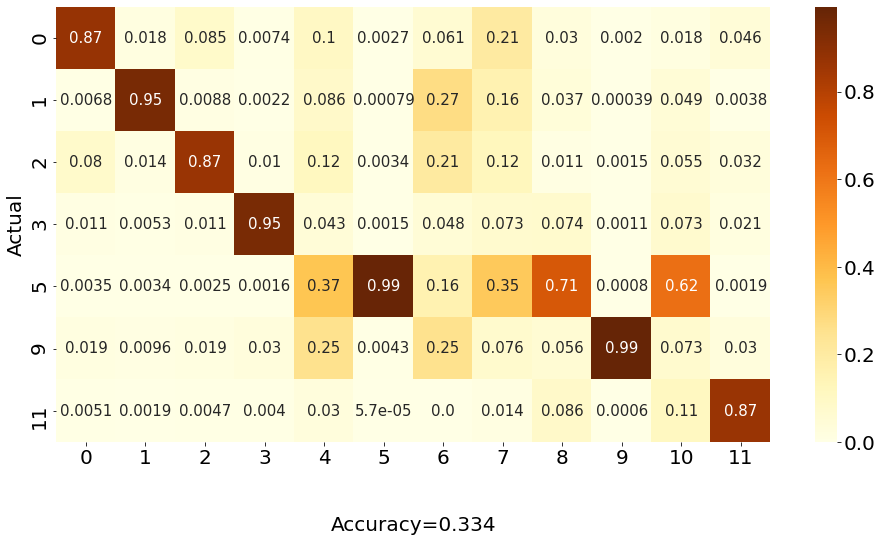

In [11]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder)

## Hyperparamter para Dataset 16

In [12]:
TestDataset = Dataset16
adj_matrices = adj_matrices16
model = model_14
STEPS_PER_EPOCH = int((len(TestDataset)/BATCH_SIZE) * 3) # 3 times

In [13]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, BATCH_SIZE)

Epoch: 68 - Loss: 0.64 - Total_Time: 22.2 mins: 100%|████████████████████████████████| 870/870 [00:15<00:00, 55.97it/s]


Epoch: 136 - Loss: 0.24 - Total_Time: 41.4 mins: 100%|███████████████████████████████| 870/870 [00:16<00:00, 54.04it/s]


Epoch: 204 - Loss: 0.23 - Total_Time: 60.9 mins: 100%|███████████████████████████████| 870/870 [00:17<00:00, 48.67it/s]


Epoch: 272 - Loss: 0.24 - Total_Time: 80.3 mins: 100%|███████████████████████████████| 870/870 [00:18<00:00, 47.66it/s]


Epoch: 340 - Loss: 0.25 - Total_Time: 100.7 mins: 100%|██████████████████████████████| 870/870 [00:17<00:00, 48.41it/s]


Epoch: 400 - Loss: 0.26 - Total_Time: 119.3 mins: 100%|██████████████████████████████| 870/870 [00:18<00:00, 46.95it/s]


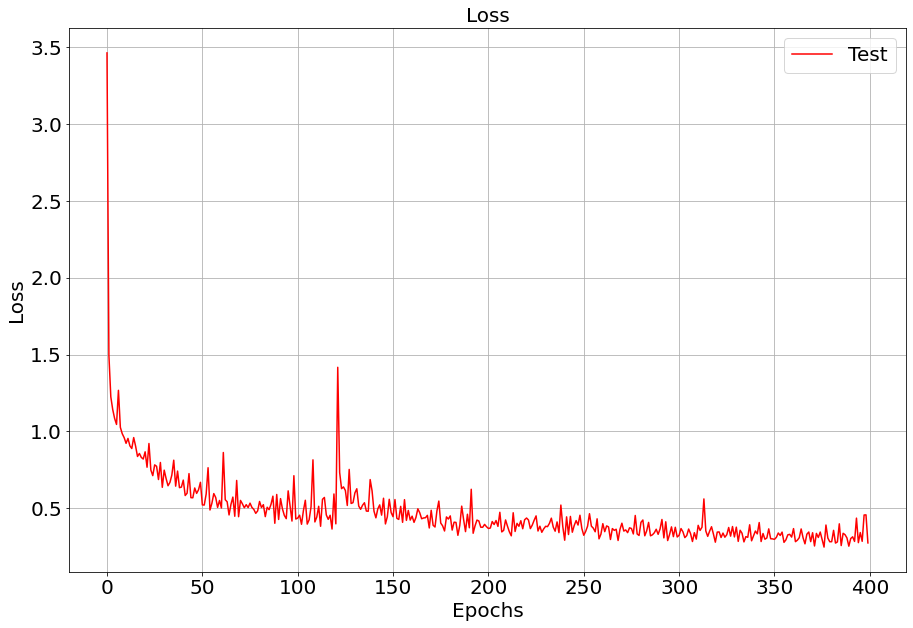

In [14]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics_tst['loss_ls'], title)

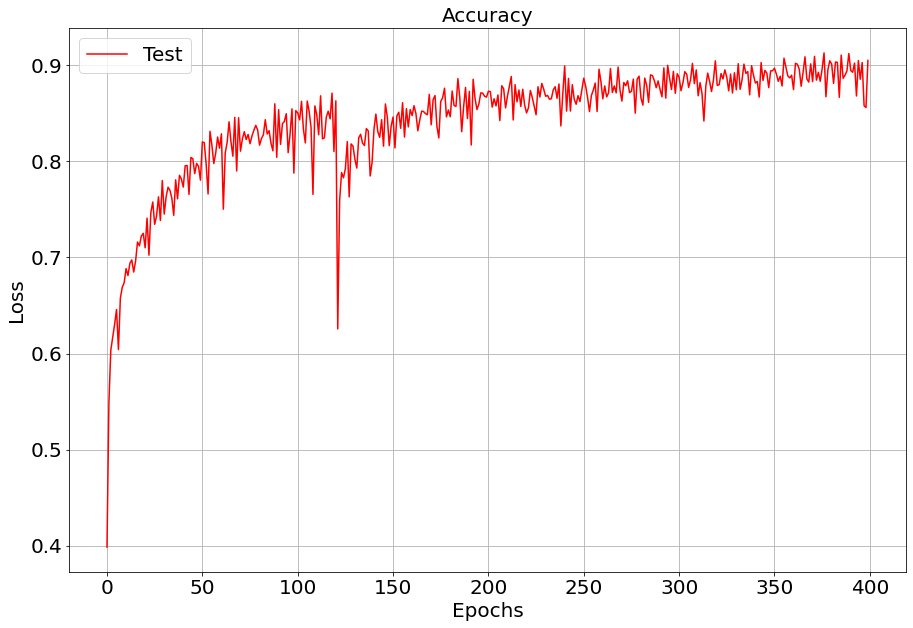

In [15]:
title_Acc = 'Accuracy'
Plot.Plot(statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.839893  0.183459  0.018443  0.046052  0.224221  0.193223   
1          0.080960  0.694405  0.011707  0.022926  0.072342  0.093586   
2          0.008183  0.022821  0.917522  0.009220  0.092326  0.096410   
3          0.013728  0.023358  0.012834  0.884422  0.202638  0.100040   
7          0.030027  0.043725  0.015909  0.014066  0.090727  0.097620   
10         0.002201  0.002612  0.001634  0.006862  0.064748  0.076240   
13         0.003267  0.004804  0.003775  0.003045  0.084732  0.109318   
16         0.016893  0.016338  0.012527  0.010210  0.097122  0.121823   
18         0.004849  0.008478  0.005651  0.003198  0.071143  0.111739   

Predicted        6         7         8         9         10        11  \
Actual                                                                  
0          0.257225  0

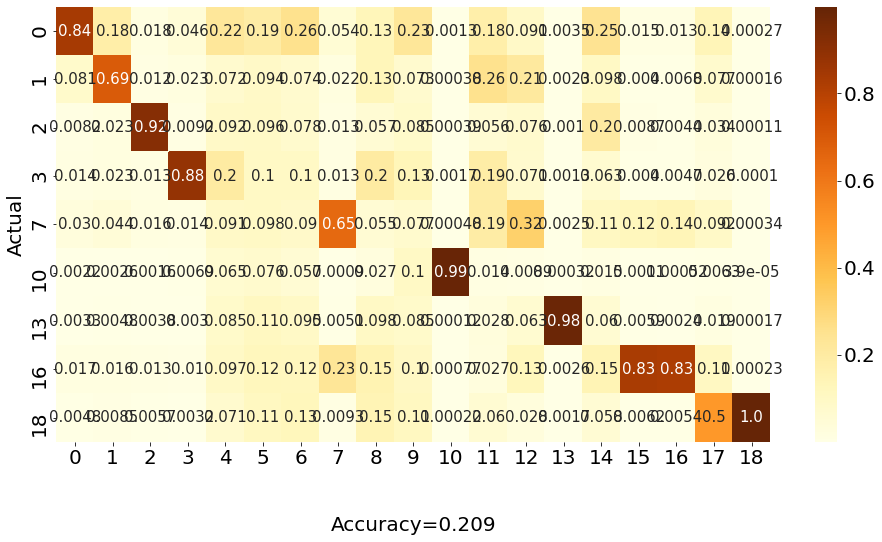

In [16]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder) 

In [19]:
TestDataset = Dataset17
adj_matrices = adj_matrices17
model = model_14
STEPS_PER_EPOCH = int((len(TestDataset)/BATCH_SIZE) * 3) # 3 times

In [20]:
_, _, statistics_tst  = Utils.Test(EPOCHS, TestDataset, model, STEPS_PER_EPOCH,\
                                   adj_matrices, BATCH_SIZE)

Epoch: 68 - Loss: 0.43 - Total_Time: 36.4 mins: 100%|██████████████████████████████| 1353/1353 [00:31<00:00, 42.90it/s]


Epoch: 136 - Loss: 0.24 - Total_Time: 70.5 mins: 100%|█████████████████████████████| 1353/1353 [00:29<00:00, 45.46it/s]


Epoch: 204 - Loss: 0.21 - Total_Time: 106.0 mins: 100%|████████████████████████████| 1353/1353 [00:33<00:00, 40.54it/s]


Epoch: 272 - Loss: 0.15 - Total_Time: 143.4 mins: 100%|████████████████████████████| 1353/1353 [00:33<00:00, 40.55it/s]


Epoch: 340 - Loss: 0.14 - Total_Time: 182.5 mins: 100%|████████████████████████████| 1353/1353 [00:35<00:00, 38.09it/s]


Epoch: 400 - Loss: 0.07 - Total_Time: 218.8 mins: 100%|████████████████████████████| 1353/1353 [00:37<00:00, 36.43it/s]


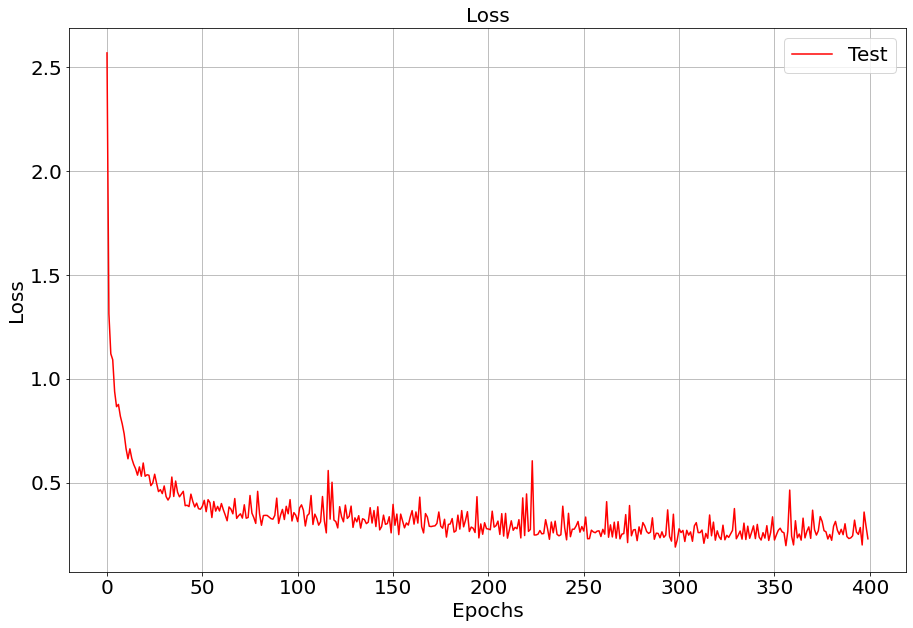

In [21]:
name = 'PROPAG_STEPS: {}, HIDDEN_LAYER: {}, BATCH_SIZE: {}, EPOCHS: {}'.format(PROPAG_STEPS,\
                                                HIDDEN_LAYER, BATCH_SIZE,EPOCHS)
title = 'Loss'

Plot.Plot(statistics_tst['loss_ls'], title)

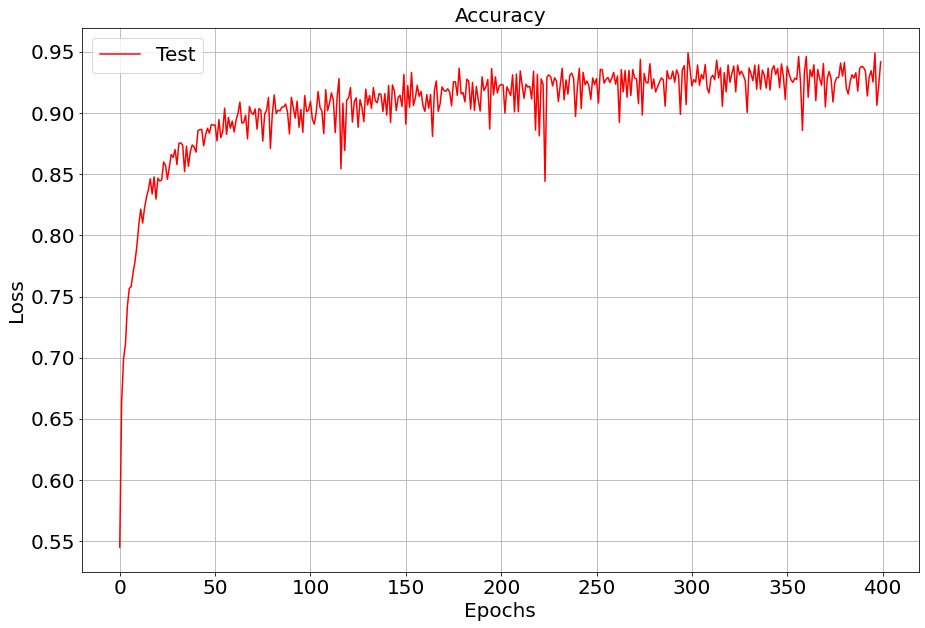

In [23]:
title_Acc = 'Accuracy'
Plot.Plot(statistics_tst['accuracy'], title_Acc)

>> condusion Matrix <<
Test
Predicted        0         1         2         3         4         5   \
Actual                                                                  
0          0.934530  0.150065  0.101456  0.036888  0.161754  0.084777   
3          0.017837  0.113519  0.499771  0.777434  0.082456  0.310878   
6          0.017645  0.117076  0.212576  0.146003  0.102807  0.256900   
7          0.005688  0.086675  0.026027  0.004422  0.128070  0.112693   
8          0.002529  0.073739  0.008669  0.002313  0.067018  0.013641   
9          0.006602  0.141009  0.024875  0.002944  0.142105  0.059401   
10         0.001910  0.023609  0.009332  0.002891  0.028772  0.031841   
11         0.001870  0.024256  0.008927  0.001676  0.036140  0.014132   
12         0.002414  0.045602  0.035064  0.008870  0.029825  0.023499   
13         0.002173  0.048836  0.028675  0.008530  0.021404  0.021883   
14         0.001375  0.037516  0.008169  0.001867  0.050526  0.008834   
15         0.002238  0.

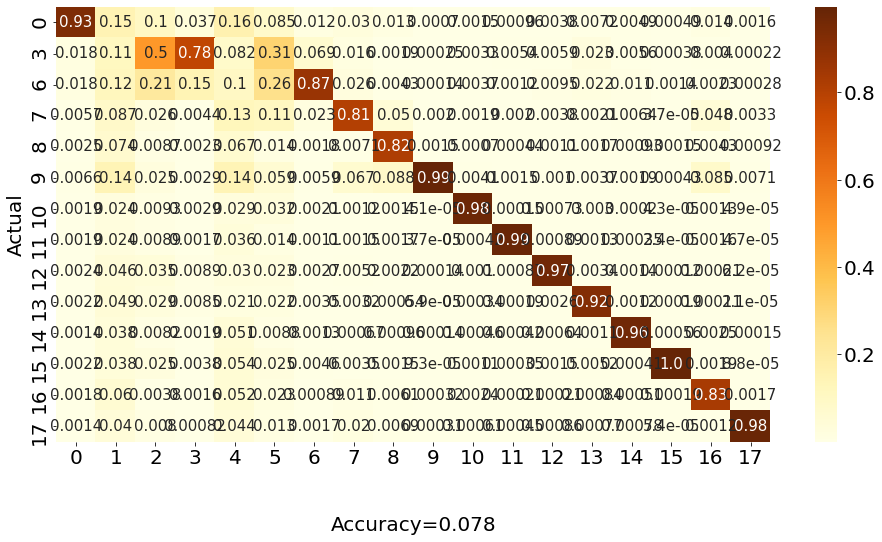

In [24]:
save_name_tst = 'Confusion_Matrix_Test'
color= 'YlOrBr'
Plot.Conf_Matrix(statistics_tst['correct'], statistics_tst['predict'], color, folder) 